# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

# To do: 變項的分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將資料依照歲數, 將 20 到 70 歲切成11個區間? (In[4], Hint : 使用 numpy.linspace),  
  送入繪圖前的除了排序外, 還要注意什麼? (In[5])
- 如何調整對應資料, 以繪製長條圖(bar chart)? (In[7])

In [4]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline
plt.style.use('ggplot')

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [5]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [7]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

In [8]:
age_data['YEARS_BIRTH']

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
125402    66.602740
125403    43.495890
125404    30.860274
125405    29.978082
125406    34.342466
Name: YEARS_BIRTH, Length: 125407, dtype: float64

In [10]:
np.linspace(20,70,num=10)

array([20.        , 25.55555556, 31.11111111, 36.66666667, 42.22222222,
       47.77777778, 53.33333333, 58.88888889, 64.44444444, 70.        ])

In [21]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

#自 20 到 70 歲，切 11 個點 (得到 10 組)
bin_cut = np.linspace(20,70,num=11)
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut) 

# 顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(35.0, 40.0]    17578
(40.0, 45.0]    16715
(30.0, 35.0]    16169
(45.0, 50.0]    14269
(50.0, 55.0]    14252
(55.0, 60.0]    13520
(25.0, 30.0]    13433
(60.0, 65.0]    11188
(20.0, 25.0]     4991
(65.0, 70.0]     3292
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


In [22]:
age_data

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
...,...,...,...,...
125402,0,24310,66.602740,"(65.0, 70.0]"
125403,0,15876,43.495890,"(40.0, 45.0]"
125404,0,11264,30.860274,"(30.0, 35.0]"
125405,0,10942,29.978082,"(25.0, 30.0]"


In [23]:
age_data.sort_values("YEARS_BINNED",inplace=False)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
71213,0,8620,23.616438,"(20.0, 25.0]"
5490,0,7736,21.194521,"(20.0, 25.0]"
89403,0,8711,23.865753,"(20.0, 25.0]"
5487,0,8262,22.635616,"(20.0, 25.0]"
12816,0,9102,24.936986,"(20.0, 25.0]"
...,...,...,...,...
39711,0,25126,68.838356,"(65.0, 70.0]"
75034,0,23987,65.717808,"(65.0, 70.0]"
120684,0,23857,65.361644,"(65.0, 70.0]"
34736,0,24376,66.783562,"(65.0, 70.0]"


In [25]:
np.sort(age_data['YEARS_BINNED'].unique())

array([Interval(20.0, 25.0, closed='right'),
       Interval(25.0, 30.0, closed='right'),
       Interval(30.0, 35.0, closed='right'),
       Interval(35.0, 40.0, closed='right'),
       Interval(40.0, 45.0, closed='right'),
       Interval(45.0, 50.0, closed='right'),
       Interval(50.0, 55.0, closed='right'),
       Interval(55.0, 60.0, closed='right'),
       Interval(60.0, 65.0, closed='right'),
       Interval(65.0, 70.0, closed='right')], dtype=object)

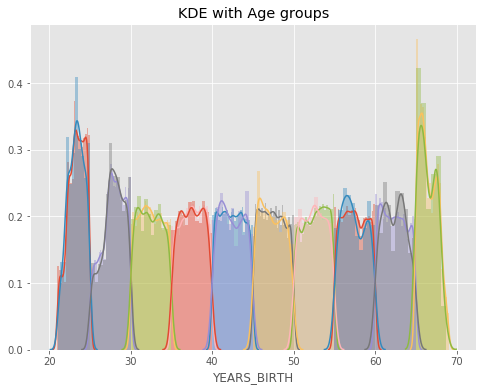

In [28]:
# 繪圖前先排序 / 分組
year_group_sorted = np.sort(age_data['YEARS_BINNED'].unique())

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

In [29]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.118814,8524.043478,23.353544
"(25.0, 30.0]",0.114569,10154.158714,27.819613
"(30.0, 35.0]",0.103346,11852.686561,32.473114
"(35.0, 40.0]",0.089942,13707.231995,37.554060
"(40.0, 45.0]",0.078612,15498.432905,42.461460
"(45.0, 50.0]",0.075969,17323.953816,47.462887
"(50.0, 55.0]",0.068552,19194.561114,52.587839
"(55.0, 60.0]",0.053624,20984.491790,57.491758
"(60.0, 65.0]",0.054344,22784.620754,62.423619


In [34]:
age_groups.index

CategoricalIndex([(20.0, 25.0], (25.0, 30.0], (30.0, 35.0], (35.0, 40.0],
                  (40.0, 45.0], (45.0, 50.0], (50.0, 55.0], (55.0, 60.0],
                  (60.0, 65.0], (65.0, 70.0]],
                 categories=[(20.0, 25.0], (25.0, 30.0], (30.0, 35.0], (35.0, 40.0], (40.0, 45.0], (45.0, 50.0], (50.0, 55.0], (55.0, 60.0], ...], ordered=True, name='YEARS_BINNED', dtype='category')

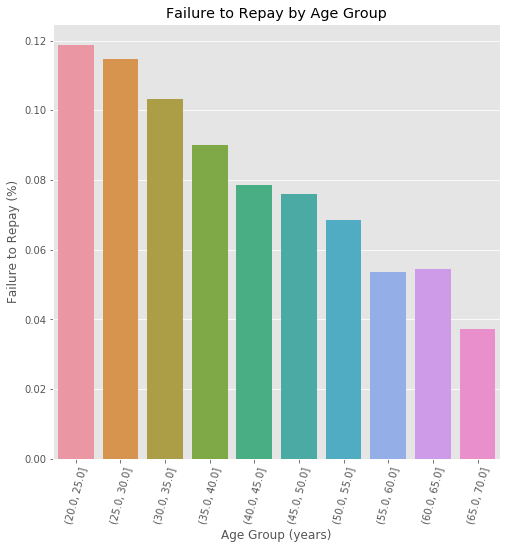

In [35]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = age_groups.index
py = age_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');